In [1]:
import pandas

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25' 
plt.rcParams['xtick.labelsize'] = '18'
plt.rcParams['ytick.labelsize'] = '18'

%matplotlib notebook

In [2]:
# Replace these variables accordingly 
path_to_results1 = "../experiments/2018-09-28-04-44_ScalabilityN_/"
path_to_results2 = "../experiments/2018-09-28-05-26_ScalabilityD_/"

In [3]:
data = pandas.read_csv(path_to_results1 + "ScalabilityN.csv", header=0)
data["category"] = [x.split("-")[0] for x in data["refId"]]

In [4]:
data = data[data['refId'] != 'refId'] # Just because some line are the repeated header...

In [5]:
data["testId"].unique()

array(['MWP', 'HiCS', 'TC', 'MS', 'CMI', 'UDS', 'II', 'MAC'], dtype=object)

In [6]:
data['n'].unique()

array(['10', '20', '50', '100', '200', '300', '500', '1000', '2000',
       '3000', '5000', '10000'], dtype=object)

In [7]:
data["n"] = [int(x) for x in data['n']] # Somehow some strings in it???
data["Contrast"] = [float(x) for x in data['Contrast']] # Somehow some strings in it???
data["Walltime"] = [float(x) for x in data['Walltime']] # Somehow some strings in it???
data["CPUtime"] = [float(x) for x in data['CPUtime']] # Somehow some strings in it???
data["prepWalltime"] = [float(x) for x in data['prepWalltime']] # Somehow some strings in it???
data["prepCPUtime"] = [float(x) for x in data['prepCPUtime']] # Somehow some strings in it???

In [8]:
data["TotalCPUtime"] = data["CPUtime"] + data["prepCPUtime"]

In [9]:
selectedData = data

In [10]:
data.columns

Index(['refId', 'nDim', 'n', 'nRep', 'testId', 'alpha', 'M', 'Contrast',
       'Walltime', 'CPUtime', 'prepWalltime', 'prepCPUtime', 'r', 'category',
       'TotalCPUtime'],
      dtype='object')

In [11]:
scalabilityd = pandas.read_csv(path_to_results2 + "ScalabilityD.csv", header=0)
scalabilityd["TotalCPUtime"] = scalabilityd["CPUtime"] + scalabilityd["prepCPUtime"]

<IPython.core.display.Javascript object>


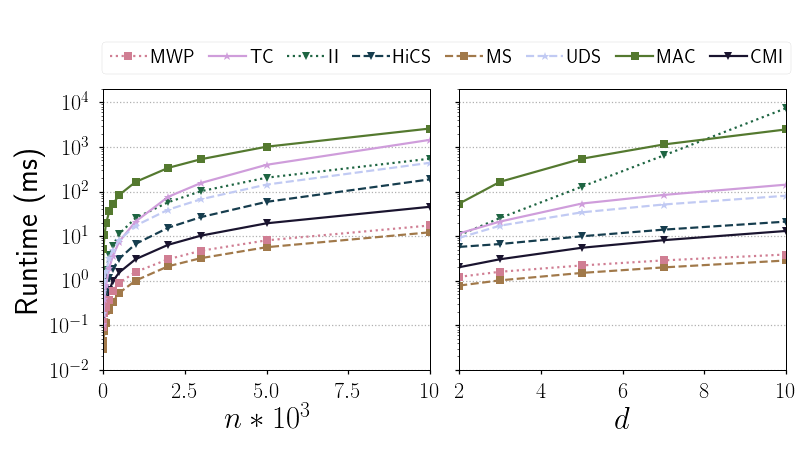

In [12]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(9,5), sharey=True) #sharex=True)
axess = axes.reshape(-1)

from cycler import cycler
monochrome=((cycler('marker', ['v', 's', "*"]) * (cycler('linestyle', ['-', '--', ':']))) + 
            cycler('color', sns.color_palette("cubehelix", 9)) )

axess[0].set_prop_cycle(monochrome)
axess[1].set_prop_cycle(monochrome)

####################################

subselectedData = selectedData[selectedData["testId"] != "MWPr"]
subselectedData['n'] = subselectedData['n'] / 1000 
d = subselectedData.groupby(["n", "testId"])


means = d.mean()
errors = d.std()
ax = means.unstack().plot(y="TotalCPUtime", logy=True, ax=axess[0])

ax.legend(ncol=3, fontsize=12, loc="lower right")


ax.set_ylabel("Runtime (ms)")
ax.set_xlabel("$n*10^3$")

ax.set_yticks([0.01, 0.1, 1, 10, 100, 1000, 10000])

L = ax.legend()
L.remove()

ax.set_xticklabels(["$0$", "$2.5$", "$5.0$", "$7.5$", "$10$"])

ax.grid(True, linestyle='dotted', axis="y")

##############################################

subselectedData = scalabilityd[scalabilityd["testId"] != "MWPr"]
d = subselectedData.groupby(["nDim", "testId"])

means = d.mean()
errors = d.std()
ax = means.unstack().plot(y="TotalCPUtime", logy=True, ax= axess[1])

ax.set_xlabel("$d$")

ax.set_yticks([0.01, 0.1, 1, 10, 100, 1000, 10000])
ax.set_ylim((0.01,20000))

handles, labels = ax.get_legend_handles_labels()
order = [5,6,2,1,4,7,3,0]

ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], 
          loc='upper left', fontsize=15,  bbox_to_anchor=(-1.12, 1.20), ncol=8,
         handletextpad=0.2, columnspacing=0.7)

ax.grid(True, linestyle='dotted', axis="y")

plt.tight_layout()
fig.subplots_adjust(top=0.80)
plt.savefig("plots/Fig10.pdf")